# Drive Mount

In [1]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd 'gdrive/MyDrive/NLP Project'

/content/gdrive/MyDrive/NLP Project


In [3]:
%pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
book_used = 2

# Import Text

In [6]:
lines = ""
with open(f'book{book_used}.txt') as f:
    lines = f.readlines()

In [7]:
textString = ""
for line in lines:
  textString += line

# Preprocess Text
Involves
- Removing ASCII Characters (Removing images, emojis, etc)
- Removing chapter names
- Removing running sections
- Removing page numbers
- Removing subtext of figures
- Removing punctuations
- Removing new lines
- Removing extra spaces
- Converting text to lowercase

In [8]:
import re

In [9]:
textString = re.sub(r'[^\x00-\x7f]', " ", textString)
if book_used == 1:
  textString = re.sub( "\n[Cc]hapter \d+\n[^\n]+\n" , " ", textString)
  textString = re.sub( "\n[0-9]+-[0-9]+\n[^\n]+\n" , " ", textString)
elif book_used == 2:
  textString = re.sub( "\nCHAP. [0-9]+\n" , "", textString)
  textString = re.sub( "\nSEC. [0-9]+.[0-9]+\n" , "", textString)
textString = re.sub( "\n[0-9]+\n" , " ", textString)
textString = re.sub( "[Ff]igure [0-9]+-[0-9]+" , " ", textString)
textString = re.sub( "[Ff]ig. [0-9]+-[0-9]+" , " ", textString)
textString = re.sub("""[^\w\s]""", " ", textString)
textString = re.sub('\n', ' ', textString)
textString = re.sub('[ ][0-9]+[ ]', ' ', textString)
textString = re.sub('[ ]\d[ ]', ' ', textString)
textString = re.sub('  ', ' ', textString)
textString = textString.lower()

In [10]:
with open(f'book{book_used}simpleProcessed_1.txt', 'w') as f:
    f.write(textString)

# Import Book1SimpleProcessed

In [11]:
lines = ""
with open(f'book{book_used}simpleProcessed_1.txt') as f:
    lines = f.readlines()
data = ""
for line in lines:
  data += line

# Tokenize Text
Also includes removing stopwords

In [12]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
data_token = word_tokenize(data)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Analyzing the Frequency Distribution of tokens
of 20 most frequent tokens

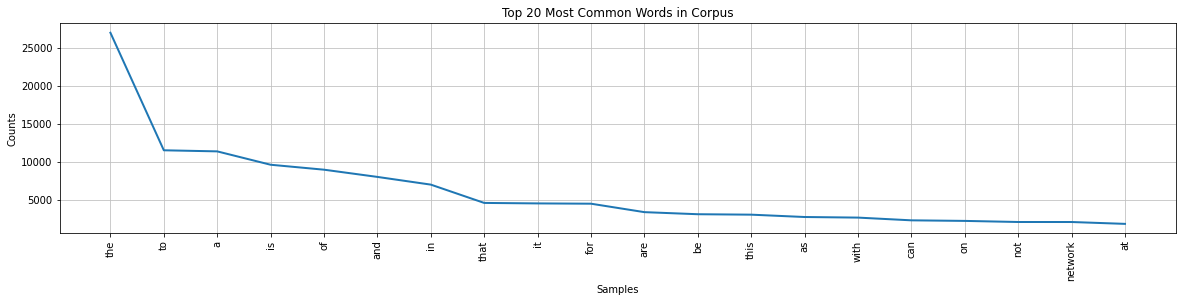

In [13]:
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

fig = plt.figure(figsize = (20,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fdist = FreqDist(data_token)
fdist.plot(20, cumulative=False, title='Top 20 Most Common Words in Corpus')
plt.show()
fig.savefig(f'book{book_used}FreqDist_1.png', bbox_inches = "tight")

# Creating the Word Cloud

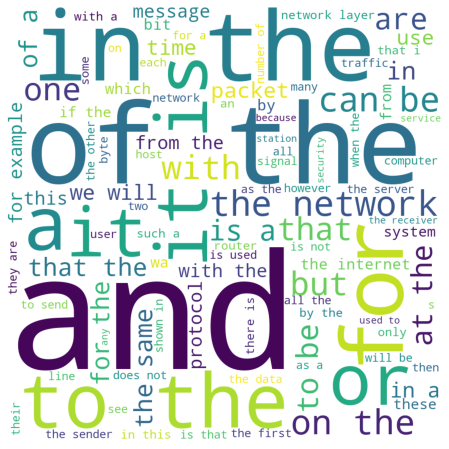

In [14]:
from wordcloud import WordCloud

word_cloud = WordCloud(width = 900, height = 900, min_font_size= 12, background_color="white", max_words=100, stopwords={}).generate(data)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.savefig(f'book{book_used}WordCloud_1.png')
plt.show()

# Removing StopWords

In [15]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
data_stopwords_token = [word for word in data_token if not word in stop_words]
data_stopwords = " ".join(data_stopwords_token)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Analyzing the Frequency Distribution of Tokens without Stopwords

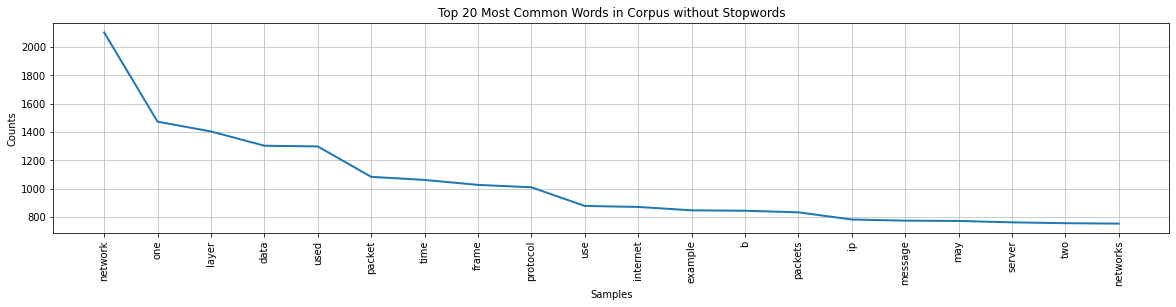

In [16]:
fig_stopwords = plt.figure(figsize = (20,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fdist_stopwords = FreqDist(data_stopwords_token)
fdist_stopwords.plot(20, cumulative=False, title='Top 20 Most Common Words in Corpus without Stopwords')
plt.show()
fig_stopwords.savefig(f'book{book_used}FreqDist_2.png', bbox_inches = "tight")

# Creating the Word Cloud without Stopwords

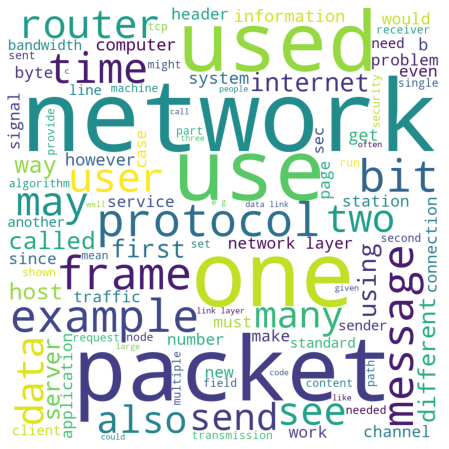

In [17]:
word_cloud_stopwords = WordCloud(width = 900, height = 900, min_font_size= 12, background_color="white", max_words=100, stopwords=set(stop_words)).generate(data_stopwords)
plt.figure(figsize = (12,8))
plt.imshow(word_cloud_stopwords)
plt.axis('off')
plt.savefig(f'book{book_used}WordCloud_2.png')
plt.show()

# Saving the book without Stopwords

In [18]:
with open(f'book{book_used}simpleProcessed_2.txt', 'w') as f:
    f.write(data_stopwords)

# POS Tagging of words in book without Stopwords

In [19]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

data_tag = pos_tag(data_stopwords_token)
data_only_tag = [word[1] for word in data_tag]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Analyzing Frequenct Distribution for POS

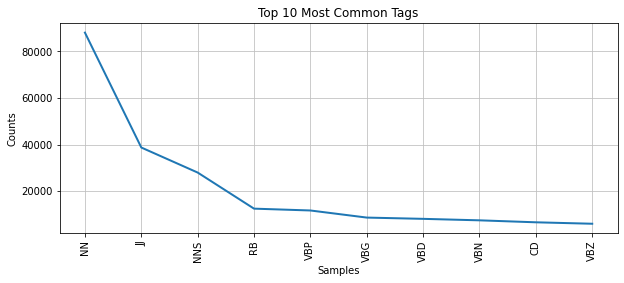

In [20]:
fig_stopwords = plt.figure(figsize = (10,4))
plt.gcf().subplots_adjust(bottom=0.15) # to avoid x-ticks cut-off
fdist_pos = FreqDist(data_only_tag)
fdist_pos.plot(10, cumulative=False, title='Top 10 Most Common Tags')
plt.show()
fig_stopwords.savefig(f'book{book_used}FreqDist_3.png', bbox_inches = "tight")

# Relationship between Word Length and its Frequency

In [21]:
data_length = [len(word) for word in data_stopwords_token]
fdist_length = FreqDist(data_length)

In [22]:
data_length_dict = {}
for i in range(1,46):
  data_length_dict[f"{i}"] = 0

for key, value in fdist_length.items():
  data_length_dict[f"{key}"] = value

data_length_x_label = []
data_length_y_label = []
for key, value in data_length_dict.items():
  data_length_x_label.append(key)
  data_length_y_label.append(value)

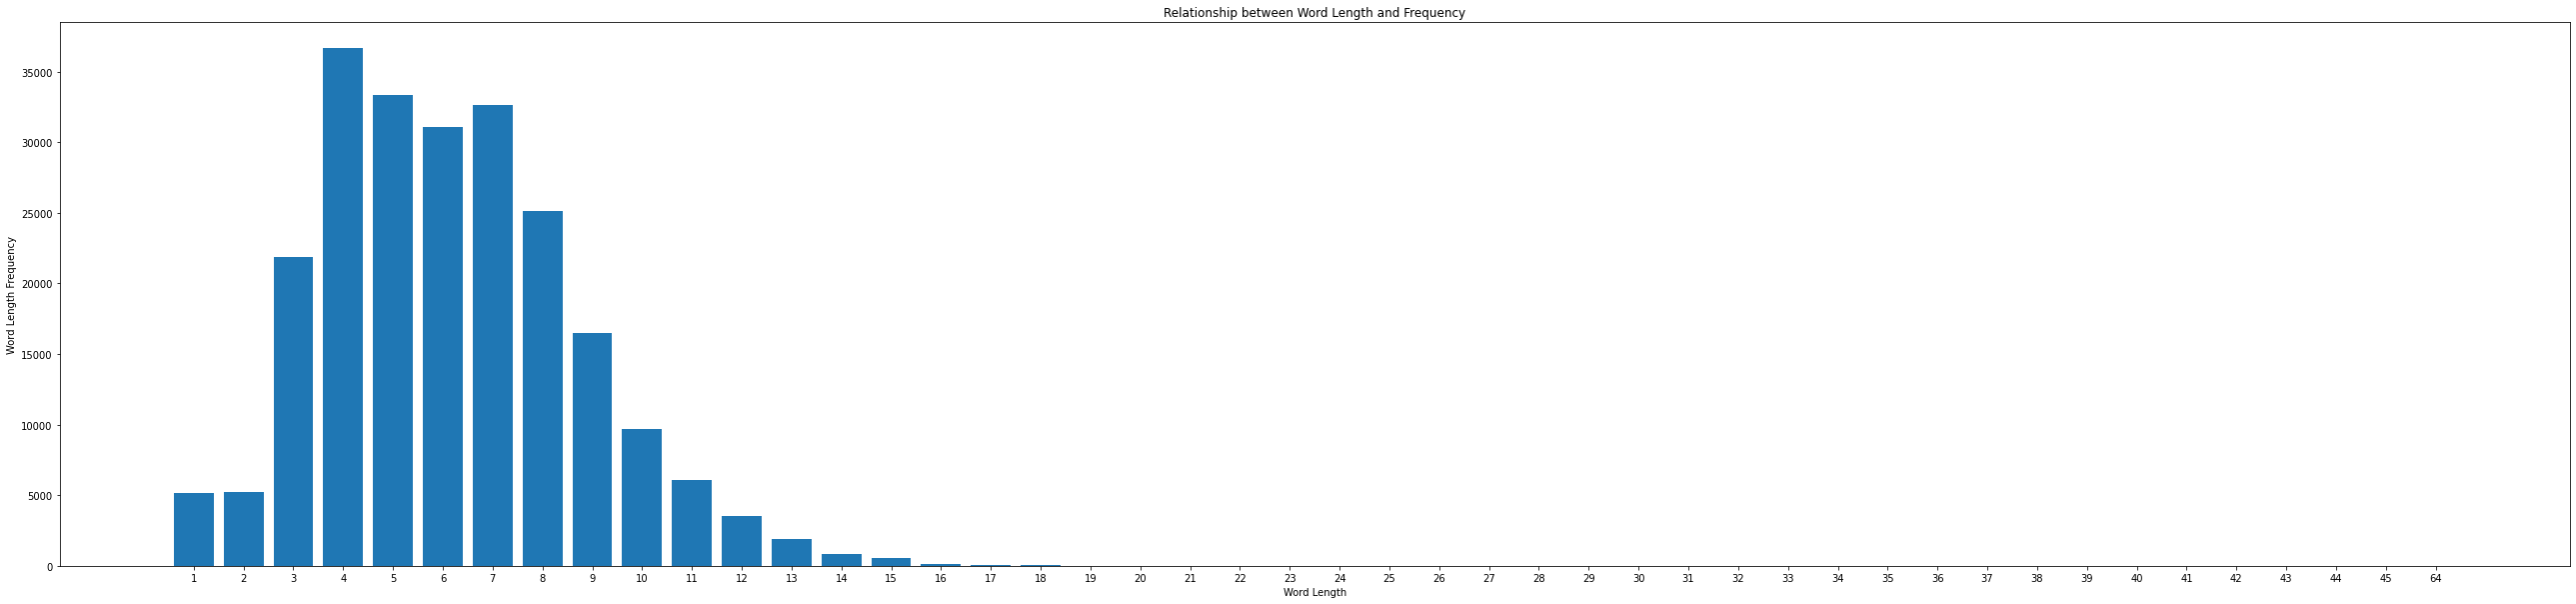

In [23]:
fig_length = plt.figure(figsize = (45,10))
plt.bar(data_length_x_label, data_length_y_label)
plt.xlabel('Word Length')
plt.ylabel('Word Length Frequency')
plt.title('Relationship between Word Length and Frequency')
fig_length.savefig(f'book{book_used}FreqDist_4.png')
fig_length.show()